# Codsoft-Data Science

# Task-5: CREDIT CARD FRAUD DETECTION

# Importing the Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection and Processing

In [3]:
#load dataset
credit=pd.read_csv("creditcard.csv")

In [4]:
#Print first 5 rows
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Number of rows and columns
credit.shape

(284807, 31)

In [6]:
#Dataset Information
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#check number of missing values
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#Distribution of normal transcation and fraudulent transcation
credit['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

The dataset is highly unbalanced
    0-----> Normal Transcation
    1-----> Fraudulent Transcation

In [9]:
#separate the normal anf fraud data
legit= credit[credit.Class==0]
fraud= credit[credit.Class==1]

In [10]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
#Statistical Measures
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
#compare the values for both transcations
credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


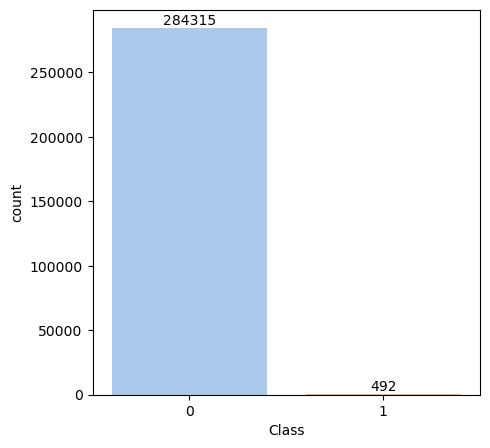

In [14]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = credit['Class'], data = credit, palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

# Handling Unbalanced Data

In [15]:
#Under Sampling
legit_sample=legit.sample(n=492)

In [16]:
#Join 2 dataframe
new_data=pd.concat([legit_sample,fraud],axis=0)
new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
219731,141855.0,-0.957062,0.491799,1.257283,-0.399882,0.889199,-0.919476,1.049138,-0.193752,-0.727503,...,-0.212119,-0.770392,-0.122614,-0.062987,0.500913,0.388474,-0.057872,0.057361,49.99,0
281771,170414.0,-1.140937,0.733046,-0.310915,-2.108542,2.090007,4.022624,-0.491541,1.188239,0.857762,...,0.324754,1.041663,-0.242163,0.749855,-0.334946,0.018005,-1.105145,-0.638984,1.00,0
267252,162691.0,-1.622857,0.161240,0.759202,-0.556111,-0.557758,0.895108,1.036395,0.521173,-0.336624,...,0.156934,-0.243525,0.430780,-0.051542,0.542198,0.470033,-0.201218,0.035153,341.00,0
14099,25089.0,1.250700,1.374343,-1.457260,1.855361,0.863905,-1.795166,0.646348,-0.435893,0.921592,...,-0.367554,-0.737270,-0.190628,-0.021008,0.816474,-0.330687,0.009636,0.089326,1.00,0
153329,98594.0,2.067028,0.118878,-0.902378,0.614242,-0.007241,-1.154878,0.140868,-0.457711,1.714561,...,-0.431271,-0.822941,0.345051,0.005385,-0.297461,0.154414,-0.092472,-0.064837,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [17]:
new_data.shape

(984, 31)

In [19]:
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [20]:
#compare the values for both transcations
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96071.156504,-0.140264,-0.108926,0.043992,-0.069567,0.011399,-0.008712,0.019484,-0.014610,-0.026871,...,-0.024351,-0.033188,-0.026312,-0.004927,0.027698,-0.007663,-0.019554,-0.035546,0.038352,96.632642
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Dependent and Independent Features


In [21]:
x=new_data.drop(columns='Class',axis=1)
y=new_data['Class']

In [22]:
print(x)
print(y)

            Time        V1        V2        V3        V4        V5        V6  \
219731  141855.0 -0.957062  0.491799  1.257283 -0.399882  0.889199 -0.919476   
281771  170414.0 -1.140937  0.733046 -0.310915 -2.108542  2.090007  4.022624   
267252  162691.0 -1.622857  0.161240  0.759202 -0.556111 -0.557758  0.895108   
14099    25089.0  1.250700  1.374343 -1.457260  1.855361  0.863905 -1.795166   
153329   98594.0  2.067028  0.118878 -0.902378  0.614242 -0.007241 -1.154878   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

# Split the data into train and test data

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [25]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(787, 30) (787,) (197, 30) (197,)


# Model Training 

In [26]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [27]:
#Training the model with training data
model.fit(x_train,y_train)

C:\Users\Varshini\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

 # Model Evaluation

In [28]:
#Accuracy Score for training data
from sklearn.metrics import accuracy_score

In [29]:
x_train_predict=model.predict(x_train)

In [30]:
x_train_predict

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,

In [31]:
train_accuracy=accuracy_score(y_train,x_train_predict)

In [32]:
print(train_accuracy)

0.9453621346886912


In [33]:
#Accuracy Score for test data
x_test_predict=model.predict(x_test)

In [34]:
print(x_test_predict)

[1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 0 1 1 1 0]


In [35]:
test_accuracy=accuracy_score(y_test,x_test_predict)

In [36]:
print(test_accuracy)

0.9086294416243654
